In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7812 - loss: 0.6319 - val_accuracy: 0.8418 - val_loss: 0.4467
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3860 - val_accuracy: 0.8587 - val_loss: 0.3956
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - loss: 0.3428 - val_accuracy: 0.8669 - val_loss: 0.3723
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 0.3132 - val_accuracy: 0.8670 - val_loss: 0.3622
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.2959 - val_accuracy: 0.8744 - val_loss: 0.3550
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8952 - loss: 0.2847 - val_accuracy: 0.8811 - val_loss: 0.3425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2673 - val_accuracy: 0.8633 - val_loss: 0.3746
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9029 - loss: 0.2602 - 

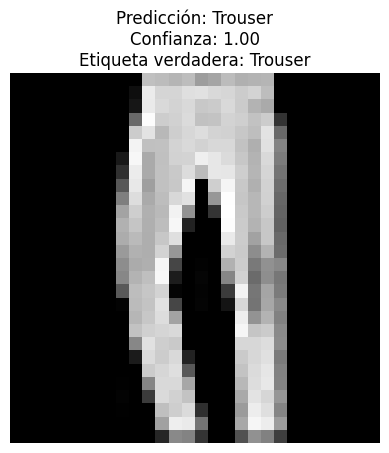

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

def predict_image(model, image):
    image = np.expand_dims(image, axis=0)  
    predictions = model.predict(image)  
    predicted_class = np.argmax(predictions)  
    confidence = np.max(predictions)  
    return predicted_class, confidence

# Seleccionar una imagen de prueba
image_index = 5  
image = x_test[image_index]
true_label = y_test[image_index]

predicted_class, confidence = predict_image(model, image)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f'Predicción: {class_names[predicted_class]}\nConfianza: {confidence:.2f}\nEtiqueta verdadera: {class_names[true_label]}')
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7856 - loss: 0.6171 - val_accuracy: 0.8533 - val_loss: 0.4107
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8621 - loss: 0.3760 - val_accuracy: 0.8637 - val_loss: 0.3861
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8790 - loss: 0.3347 - val_accuracy: 0.8605 - val_loss: 0.3839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8856 - loss: 0.3101 - val_accuracy: 0.8700 - val_loss: 0.3589
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8924 - loss: 0.2953 - val_accuracy: 0.8673 - val_loss: 0.3758
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8982 - loss: 0.2752 - val_accuracy: 0.8763 - val_loss: 0.3492
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8995 - loss: 0.2707 - val_accuracy: 0.8748 - val_loss: 0.3493
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9056 - loss: 0.2523 - 

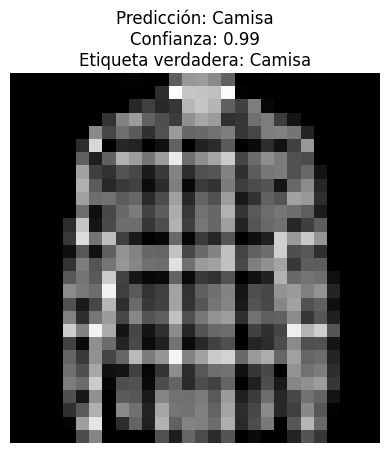

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalización de los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Nombres de las clases (categorías)
categories = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
              'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')  
])

# Configuración del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluación del modelo
loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nPrecisión alcanzada en el conjunto de prueba: {accuracy:.2f}')

# Función para realizar predicciones
def classify_image(model, img):
    img = np.expand_dims(img, axis=0)  
    probabilities = model.predict(img)
    predicted_index = np.argmax(probabilities)
    confidence_level = np.max(probabilities)
    return predicted_index, confidence_level

# Selección de imagen para prueba
index = 7  
test_image = test_images[index]
actual_label = test_labels[index]

# Predicción del modelo
predicted_label, confidence = classify_image(model, test_image)

# Visualización de la imagen con resultados
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.title(f'Predicción: {categories[predicted_label]}\n'
          f'Confianza: {confidence:.2f}\n'
          f'Etiqueta verdadera: {categories[actual_label]}')
plt.show()
